<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller 7: Clasificación y Agrupación
###    Especialización en Analítica de Datos
###    Jorge Eduardo Gomez Forero
###    Cod 616201010
### Objetivo: Elaborar Modelo de clasificación (Supervisado) y Modelo de Agrupación (No Supervisado)

In [146]:
import re
import json
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

### Se realiza el cargue de la infomación, para este ejercicio es un archivo csv.

In [118]:
ruta = "C:/03_Jorge/01_Especialización_Analitica/02_Semestre/04 Electiva Fundamentos NLP/20201017/"

In [119]:
# Cargar datos
path = ruta  + 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
print(f"El conjunto de datos contiene {len(data)} registros")
data.head()

El conjunto de datos contiene 1000 registros


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Modelo de Clasificación: Regresión Logistica

## 1. Se realiza revisión del balance de los datos de acuerdo con la categoria de clasificación

In [120]:
print("La variable dependiente se encuentra categorizada como:")
print()
print(data.product_category.value_counts(normalize=True))
print()
print("Aprovechamos que la base contiene el idioma para revisar los diferentes lenguajes que se encuentran en el texto:")
print()
print(data.language.value_counts(normalize=True))

La variable dependiente se encuentra categorizada como:

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

Aprovechamos que la base contiene el idioma para revisar los diferentes lenguajes que se encuentran en el texto:

es    1.0
Name: language, dtype: float64


## 2. Se generan las muestras de entrenamiento (training) y prueba (test), 70% y 30% respectivamente.

In [121]:
from sklearn.model_selection import train_test_split

#random_state: hace las veces de semilla, para este caso selecione la semilla 33 para facilitar la replica de los datos
train, test = train_test_split(data, test_size=0.3, random_state=33)

print(f"Tenemos un total de {data.shape[0]} datos.")
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

Tenemos un total de 1000 datos.
El conjunto de datos de entrenamiento tiene 700 registros
El conjunto de datos de prueba tiene 300 registros


## 3. Se realiza el pre-procesamiento del texto (Feature Engineering)

In [123]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    data['pre'] = texto
    return texto

tfidf_vect_logreg = TfidfVectorizer(preprocessor=pre_procesado)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,pre
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,compre toda ilusión llegan bonitos dudo lleven...
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,compre toda ilusión llegan bonitos dudo lleven...
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,compre toda ilusión llegan bonitos dudo lleven...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,compre toda ilusión llegan bonitos dudo lleven...
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,compre toda ilusión llegan bonitos dudo lleven...


In [124]:
X_train = tfidf_vect_logreg.fit_transform(train.review_body.values) #esla marca de 0 y 1
y_train = train.product_category.values #Son las categorias

X_test = tfidf_vect_logreg.transform(test.review_body.values)
y_test = test.product_category.values #Son las categorias

## 4. Entrenamiento del modelo de regresión logistica

In [125]:
from sklearn.linear_model import LogisticRegression
LogisticRegression() #visualización de la información que maneja el modelo

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
%%time
# Inicializamos clasificadores
logreg = LogisticRegression(class_weight ='balanced') #balanced: para balancear la variable objetivo

#Entrenamiento de Modelos
logreg.fit(X_train, y_train);

# Hacemos las predicciones para los datos de prueba (test)
y_pred_logreg = logreg.predict(X_test)

Wall time: 11 ms


## 5. Evaluación del modelo a partir de las funciones de costo (Exactitud, precisión y sensibilidad)

In [127]:
#Librerias para analizar las funciones de costo
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix # sale error se debe ingresar en la terminal "conda update scikit-learn"

metricas = [precision_score, recall_score, f1_score]
 
for metrica in metricas:
    print(metrica.__name__)
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):>7.2f}")


precision_score
Regresión Logística:    0.87
recall_score
Regresión Logística:    0.79
f1_score
Regresión Logística:    0.83


## 6. Se elabora la matriz de confusión para visualizar la clasificación del modelo

Text(0.5, 1.0, 'Regresión Logística')

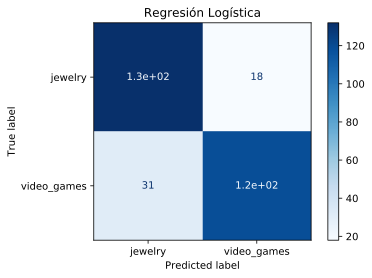

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues')
plt.title("Regresión Logística")

## 7. Términos más importantes de cada categoría

In [129]:
#Diccionario: se realiza la creación de un diccionario con las palabras del texto
vocab = {value:key for key, value in tfidf_vect_logreg.vocabulary_.items()}
len(vocab)

2936

In [130]:
#Coeficientes: Se crea una tupla con los coeficientes de cada palabra ordenado esde el coeficiente con mayor peso al de menor peso
word_coef_tot = [(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))]
print(word_coef_tot)

[('calidad', -2.23), ('bonito', -2.12), ('foto', -1.74), ('bonitos', -1.69), ('cadena', -1.52), ('pulsera', -1.42), ('plata', -1.34), ('pendientes', -1.13), ('bonita', -1.1), ('queda', -1.07), ('colgante', -0.96), ('fina', -0.93), ('tamaño', -0.89), ('cierre', -0.87), ('quedan', -0.83), ('grandes', -0.82), ('pequeño', -0.8), ('preciosa', -0.77), ('ve', -0.77), ('buena', -0.76), ('gracias', -0.76), ('mujer', -0.74), ('collar', -0.74), ('pequeños', -0.71), ('pequeña', -0.69), ('grande', -0.68), ('pone', -0.65), ('diseño', -0.64), ('enseguida', -0.64), ('parece', -0.64), ('fotos', -0.63), ('mala', -0.62), ('bonitas', -0.61), ('fino', -0.57), ('ven', -0.57), ('anillo', -0.56), ('demasiado', -0.56), ('piedras', -0.55), ('dedo', -0.54), ('igual', -0.53), ('brillo', -0.53), ('llegaron', -0.52), ('color', -0.51), ('seguro', -0.51), ('baja', -0.5), ('dorado', -0.49), ('bolsa', -0.49), ('corresponde', -0.48), ('perdido', -0.48), ('llego', -0.47), ('aspecto', -0.47), ('feo', -0.47), ('esperaba', 

In [131]:
N_coef = 20
word_coef_pos = word_coef_tot[-N_coef:]
word_coef_neg = word_coef_tot[:N_coef]

print(f"Las {N_coef} palabras con coeficientes más altos que permiten clasificar el tema de las joyas:"); print()
print(word_coef_neg)
print()
print(f"Las {N_coef} palabras con coeficientes más altos que permiten clasificar el tema de los video juegos:"); print()
print(word_coef_pos)

Las 20 palabras con coeficientes más altos que permiten clasificar el tema de las joyas:

[('calidad', -2.23), ('bonito', -2.12), ('foto', -1.74), ('bonitos', -1.69), ('cadena', -1.52), ('pulsera', -1.42), ('plata', -1.34), ('pendientes', -1.13), ('bonita', -1.1), ('queda', -1.07), ('colgante', -0.96), ('fina', -0.93), ('tamaño', -0.89), ('cierre', -0.87), ('quedan', -0.83), ('grandes', -0.82), ('pequeño', -0.8), ('preciosa', -0.77), ('ve', -0.77), ('buena', -0.76)]

Las 20 palabras con coeficientes más altos que permiten clasificar el tema de los video juegos:

[('problema', 0.71), ('bastante', 0.72), ('va', 0.73), ('juegazo', 0.73), ('español', 0.74), ('mandos', 0.78), ('versión', 0.78), ('juegos', 0.79), ('nintendo', 0.79), ('switch', 0.79), ('solo', 0.83), ('cable', 0.85), ('jugar', 0.9), ('consola', 0.99), ('ps', 1.13), ('funciona', 1.28), ('hijo', 1.36), ('perfecto', 1.36), ('mando', 1.66), ('juego', 3.41)]


## 8. Prueba de la clasificación con el modelo regresión logistica

In [132]:
text_test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
text_logreg =tfidf_vect_logreg.transform(text_test) #transforma a matriz  de 1 y 0. 

print(logreg.predict(text_logreg))
logreg.predict_proba(text_logreg)

['video_games' 'jewelry']


array([[0.25320283, 0.74679717],
       [0.81749332, 0.18250668]])

# Modelo de Agrupación: KMeans

## 1. Se realiza el pre-procesamiento del texto (Feature Engineering)

In [133]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

## 2. Método del codo para determinar $K$

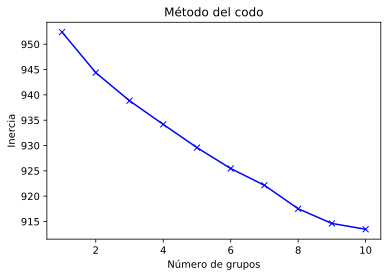

In [134]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks_codo = []        #para almacenar la lista de grupos
k_inertia = [] #para almacenar la inercia


for k in range(1,11):
    np.random.seed(33) #Semilla
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks_codo.append(k)
    k_inertia.append(kmeans.inertia_)
    
plt.xlabel('Número de grupos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks_codo, k_inertia, 'bx-')

### para los datos de estudio no se evidencia la aplicación del método del codo, dado que no existe una inflexión en punto determinado, de hecho la pendiente se observa bastante lineal.

## 2. Método del codo para determinar $Silueta$

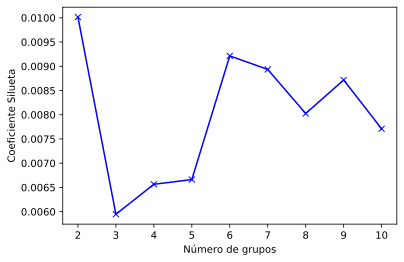

In [135]:
from sklearn.metrics import silhouette_score

ks_silueta = []
k_coeficiente_Silueta = []

for k in range(2,11):
    np.random.seed(33) #Semilla
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks_silueta.append(k)
    y = kmeans.predict(tfidf_matrix)
    k_coeficiente_Silueta.append(silhouette_score(tfidf_matrix, y))

plt.plot(ks_silueta, k_coeficiente_Silueta, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Coeficiente Silueta')
plt.show()

### Lo que se espera es que el coeficiente de silueta entre más alto, el K es mejor para utilizar.

## 3. Entrenar modelo con el $K$ escogido

In [136]:
#Los resultados gráfico del método del codo no permiten establecer un punto de corte, sin embargo, a partir de los 10 grupos
#que se observaron en el método del codo, se toma la decisión de selecionar un k igual a 5.
k = 5
np.random.seed(33) #Semilla
model = KMeans(n_clusters=k)
#la matriz tfidf convierten las frases en columnas, en donde cada palabra queda en una columna
model.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
nbrs_euclidean = NearestNeighbors(n_neighbors=k, metric="euclidean",p=2).fit(tfidf_matrix.values)
nbrs_euclidean

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [138]:
#Peso de las palabras
data['cluster'] = model.labels_
model.cluster_centers_

array([[-1.08420217e-18,  8.67361738e-19,  1.08420217e-19, ...,
        -2.16840434e-19,  4.50380629e-03,  6.50521303e-19],
       [ 1.23525801e-03,  2.16840434e-18,  8.09426245e-04, ...,
         8.08437448e-04,  3.81473839e-03,  1.51788304e-18],
       [-2.38524478e-18, -2.16840434e-18,  1.08420217e-18, ...,
         4.87890978e-19,  1.82189955e-03,  1.43926604e-03],
       [ 1.75632124e-03,  1.41936639e-03,  1.19262239e-18, ...,
         2.71050543e-19, -8.23993651e-18,  3.58099360e-03],
       [ 8.67361738e-19,  7.85209372e-03, -2.16840434e-19, ...,
        -7.04731412e-19, -5.20417043e-18, -1.30104261e-18]])

In [139]:
num_doc = clust_cnt = data['cluster'].value_counts()
num_doc #número de textos por cluster

1    312
3    261
2    234
4    117
0     76
Name: cluster, dtype: int64

In [140]:
#ordena los centroides, asignando un numero a las palabras
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[3366,  379,  877, ..., 1291,  841, 1605],
       [1995, 2921,  877, ..., 1237, 1783, 3563],
       [2189, 2400, 1196, ..., 2413, 2615,  379],
       [2335,  877, 3237, ..., 3560, 3740, 2062],
       [ 403,  452, 3639, ..., 2392,  817, 2621]], dtype=int64)

In [141]:
#Unión de los dos últimos códigos e impresión de las 15 palabras más representativas por centroide
data['cluster'] = model.labels_

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range(k):
    print(f"Cluster #{i}")
    print(f"TERMINOS: ", end=" ") #El espacio es para separar los  clusters
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n\n")

CLUSTERS:

Cluster #0
TERMINOS:  son bonitos de muy los pero no pequeños que se para bien pendientes grandes un 


Cluster #1
TERMINOS:  la que de en es el no lo se por un pero para los con 


Cluster #2
TERMINOS:  me no el ha que lo de llegado es la juego pero para he en 


Cluster #3
TERMINOS:  muy de se el en la perfecto buen pero los con bien las no bonito 


Cluster #4
TERMINOS:  buena calidad un para regalo le precio es muy mi fue de que una la 




##  4 Visualización usando PCA

In [142]:
#Asignar una categoria o nombre al cluster para facilitar su explicación
clusters = {0:'Cero',1:'Uno',2:'Dos',3:'Tres',4:'Cuatro',5:'Cinco'}

data['cluster_name'] = data['cluster'].apply(lambda val: clusters[val])
data['texto_peq'] = data['review_body'].apply(lambda texto: texto[:100]) #lo deja hasta 100 para mejorar la visualización
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,pre,cluster,cluster_name,texto_peq
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,preciosos aretes buena calidad,4,Cuatro,"Buen. Buena calidad, y buena presentación."
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,preciosos aretes buena calidad,3,Tres,"Un producto a perfecto, para salir de casa con..."
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,preciosos aretes buena calidad,2,Dos,No funciona con Nintendo Switch. No hay forma ...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,preciosos aretes buena calidad,2,Dos,"Recomendado, los utilizo para pc y no me dan n..."
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,preciosos aretes buena calidad,3,Tres,El cable funciona bien podria ser un poco mas ...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,preciosos aretes buena calidad,1,Uno,En la foto parece que la cadena sea más gruesa...
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,preciosos aretes buena calidad,1,Uno,"Bien por su precio, la cadena demasiado fina."
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,preciosos aretes buena calidad,3,Tres,Muy bien!! Ahora tengo organizados los pendien...
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,preciosos aretes buena calidad,1,Uno,"Las tapas para los joystics no están nada mal,..."


In [143]:
#Se importan librerias para reducción de dimensiones y visualización
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [147]:
#Con PCA se hace una reducción de datos para facilitar la visualización, ya que son muchas dimensiones (20.504),
#sin embargo, es importante recordar que se puede perder algo de información

pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

### Gráficamente  se observa que una parte de los 5 grupos seleccionandos generan entre ellos un subgrupo, en realidad los grupos contemplan palabras muy parecidas.

# Comparación entre el Modelo de clasificación y Agrupación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [148]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

# transformar con tfidf usado para clasificación
test_clasif =tfidf_vect_logreg.transform(test) #transforma a matriz  de 1 y 0.
# resultado para clasificación modelo logistico
print(logreg.predict(test_clasif))
logreg.predict_proba(test_clasif)

['video_games' 'jewelry']


array([[0.25320283, 0.74679717],
       [0.81749332, 0.18250668]])

In [149]:
# transformar con tfidf usado para agrupación
test_group = tfidf_vect.transform(test)
# resultado para clasificación agrupación Kmeans
print(model.predict(test_group))
clusters[model.predict(test_group)[0]]

[2 4]


'Dos'

### Se observa que para el ejemplo de prueba los dos modelos clasifican correctamente, sin embargo, es importante tener en cuenta que la prueba esta sesgada ya que en los dos textos se encuentran las palabras más representativos de cada una de las clasificaciones, es recomendable realizar más pruebas.

### Preguntas

- ¿A cuál modelo le fue mejor?
    
    Con el ejercicio propuesto se puede decir que los dos modelos cumplen con el objetivo de clasificación.


- ¿Cuál modelo se demoró más en entrenar?
    
    El Modelo Kmeans presento un poco más de demora operativa y de análisis gráfico.


- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?

    Si bien los datos se encuentra balanceados en su clasificación jewelry=0.502, video_games=0.498, se observa que existe
    un volumen importante de textos donde las palabras tienen mayor predominancia a definir la clasificación como joyas, de
    hecho se realizaron varias pruebas y a menor número de cluster se evidencia que un cluster presenta un volumen mucho
    más alto de textos que los demas cluster.


- ¿Alguna otra observación?

    Cuando el método del codo en kmeans no genera un evidente punto de inflexión, se hace difícil seleccionar el punto de
    corte.

